In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2024/players.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2024/games.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2024/tackles.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2024/plays.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_2.csv


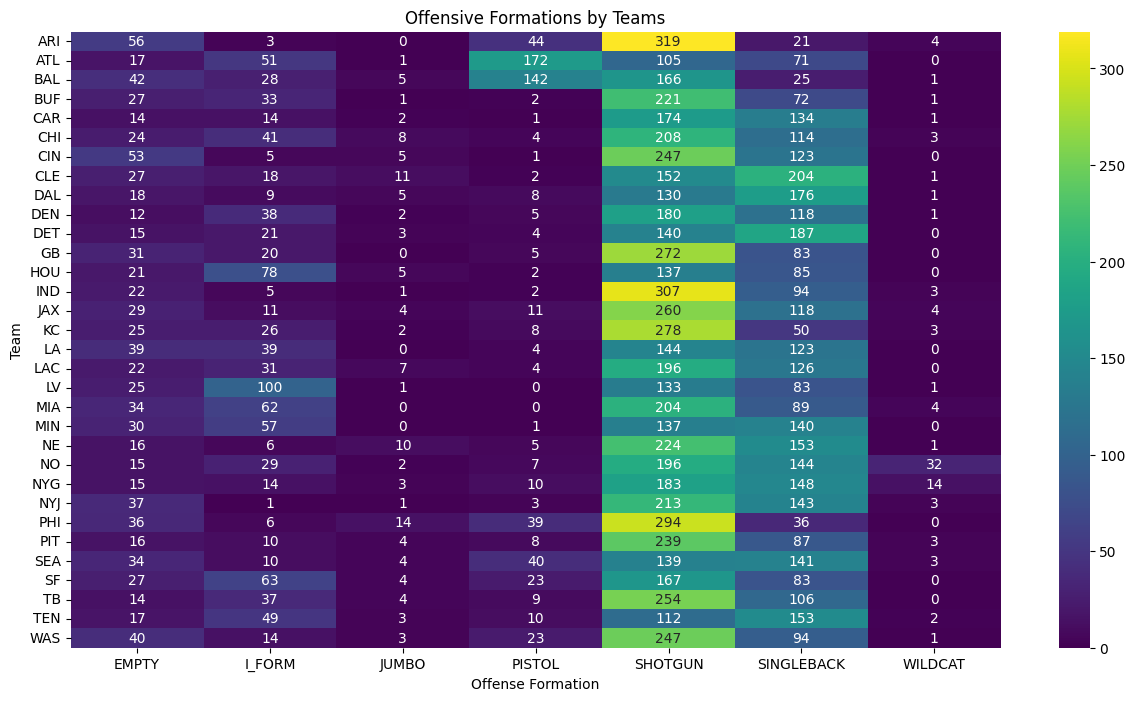

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load necessary data
games_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/games.csv')
plays_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/plays.csv')
players_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/players.csv')

# Merge datasets to get relevant information
merged_df = plays_df.merge(games_df[['gameId', 'homeTeamAbbr', 'visitorTeamAbbr']], on='gameId')
merged_df = merged_df.merge(players_df[['nflId', 'position', 'displayName']], left_on='ballCarrierId', right_on='nflId', how='left')

# Analyze offensive formations by teams
offensive_formations = merged_df.groupby(['possessionTeam', 'offenseFormation']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(15, 8))
sns.heatmap(offensive_formations, annot=True, cmap='viridis', fmt='g')
plt.title('Offensive Formations by Teams')
plt.xlabel('Offense Formation')
plt.ylabel('Team')
plt.show()


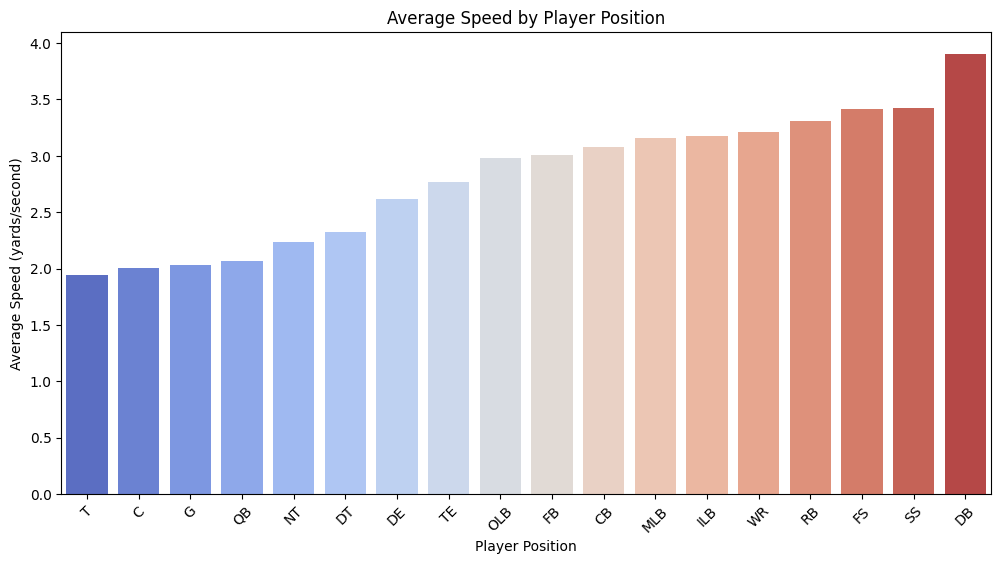

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load necessary data
tracking_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/tracking_week_1.csv')  # You may choose a specific tracking file

# Merge with players data to get player positions
players_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/players.csv')
tracking_df = tracking_df.merge(players_df[['nflId', 'position', 'displayName']], on='nflId', how='left')

# Calculate average speed by player position
average_speed_by_position = tracking_df.groupby('position')['s'].mean().sort_values()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=average_speed_by_position.index, y=average_speed_by_position.values, palette='coolwarm')
plt.title('Average Speed by Player Position')
plt.xlabel('Player Position')
plt.ylabel('Average Speed (yards/second)')
plt.xticks(rotation=45)
plt.show()


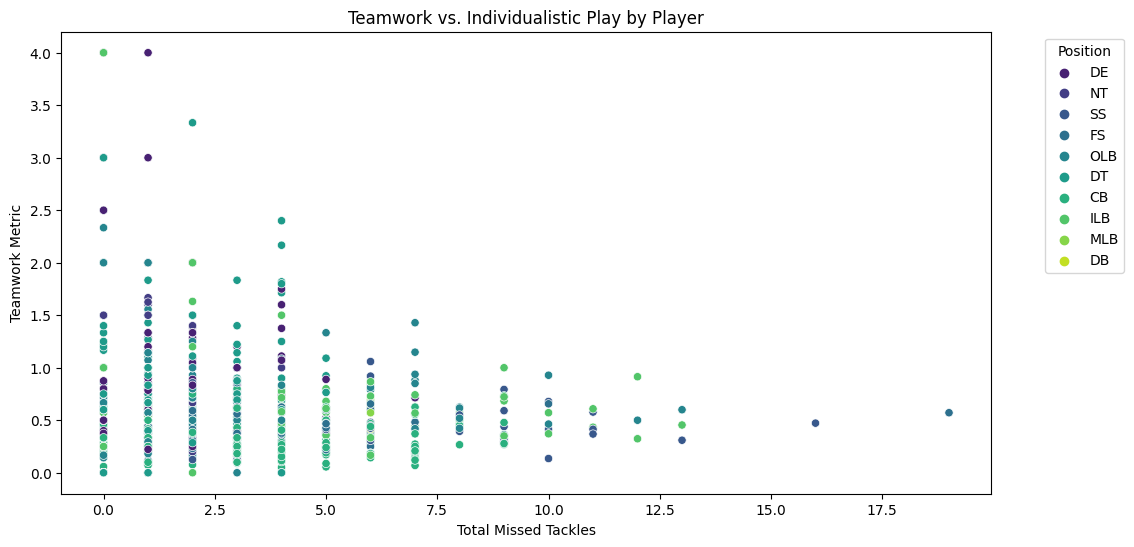

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load necessary data
tackles_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/tackles.csv')
players_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/players.csv')

# Merge datasets to get relevant information
merged_df = tackles_df.merge(players_df[['nflId', 'position', 'displayName']], on='nflId', how='left')

# Calculate total tackles and assists for each player
player_stats = merged_df.groupby(['nflId', 'displayName', 'position']).agg(
    total_tackles=pd.NamedAgg(column='tackle', aggfunc='sum'),
    total_assists=pd.NamedAgg(column='assist', aggfunc='sum'),
    total_missed_tackles=pd.NamedAgg(column='pff_missedTackle', aggfunc='sum')
).reset_index()

# Define a metric for teamwork vs. individualistic play
player_stats['teamwork_metric'] = player_stats['total_assists'] / (player_stats['total_tackles'] + 1)  # Avoid division by zero

# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_missed_tackles', y='teamwork_metric', hue='position', data=player_stats, palette='viridis')
plt.title('Teamwork vs. Individualistic Play by Player')
plt.xlabel('Total Missed Tackles')
plt.ylabel('Teamwork Metric')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


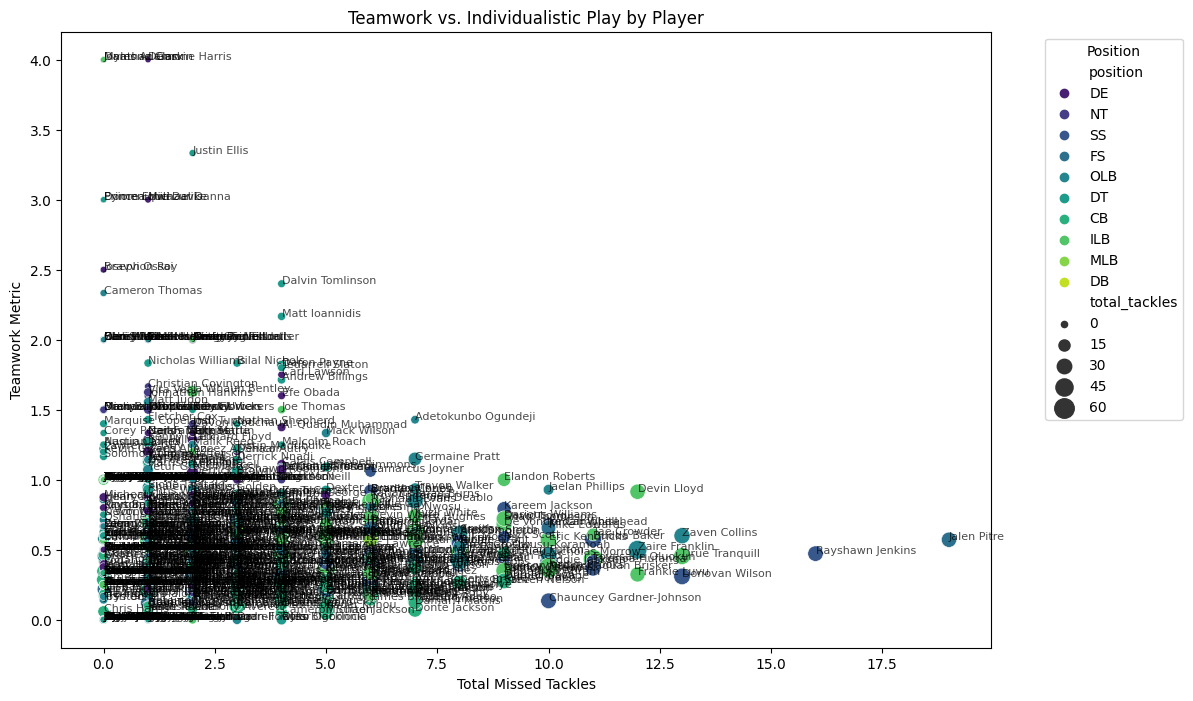

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load necessary data
tackles_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/tackles.csv')
players_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/players.csv')

# Merge datasets to get relevant information
merged_df = tackles_df.merge(players_df[['nflId', 'position', 'displayName']], on='nflId', how='left')

# Calculate total tackles and assists for each player
player_stats = merged_df.groupby(['nflId', 'displayName', 'position']).agg(
    total_tackles=pd.NamedAgg(column='tackle', aggfunc='sum'),
    total_assists=pd.NamedAgg(column='assist', aggfunc='sum'),
    total_missed_tackles=pd.NamedAgg(column='pff_missedTackle', aggfunc='sum')
).reset_index()

# Define a metric for teamwork vs. individualistic play
player_stats['teamwork_metric'] = player_stats['total_assists'] / (player_stats['total_tackles'] + 1)  # Avoid division by zero

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_missed_tackles', y='teamwork_metric', hue='position', size='total_tackles', sizes=(20, 200), data=player_stats, palette='viridis')
plt.title('Teamwork vs. Individualistic Play by Player')
plt.xlabel('Total Missed Tackles')
plt.ylabel('Teamwork Metric')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
# Annotate with player names
for i, player in player_stats.iterrows():
    plt.text(player['total_missed_tackles'], player['teamwork_metric'], player['displayName'], fontsize=8, alpha=0.7)
plt.show()


In [8]:
import pandas as pd

# Load necessary data
tackles_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/tackles.csv')
players_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/players.csv')

# Merge datasets to get relevant information
merged_df = tackles_df.merge(players_df[['nflId', 'position', 'displayName']], on='nflId', how='left')

# Calculate total tackles and assists for each player
player_stats = merged_df.groupby(['nflId', 'displayName', 'position']).agg(
    total_tackles=pd.NamedAgg(column='tackle', aggfunc='sum'),
    total_assists=pd.NamedAgg(column='assist', aggfunc='sum'),
    total_missed_tackles=pd.NamedAgg(column='pff_missedTackle', aggfunc='sum')
).reset_index()

# Define a metric for teamwork vs. individualistic play
player_stats['teamwork_metric'] = player_stats['total_assists'] / (player_stats['total_tackles'] + 1)  # Avoid division by zero

# Categorize players based on the teamwork metric (you can adjust the threshold)
threshold = 0.5
player_stats['play_style'] = player_stats['teamwork_metric'].apply(lambda x: 'Teamwork' if x >= threshold else 'Individualistic')

# Display the results in a table
result_table = player_stats[['displayName', 'position', 'play_style']]
print(result_table)


           displayName position       play_style
0      Calais Campbell       DE         Teamwork
1         Tyson Alualu       NT         Teamwork
2       Brandon Graham       DE         Teamwork
3    Jason Pierre-Paul       DE         Teamwork
4       Kareem Jackson       SS         Teamwork
..                 ...      ...              ...
795     Sam Okuayinonu       DE  Individualistic
796     Ryder Anderson       DT  Individualistic
797       Prince Emili       DT         Teamwork
798   Ja'Marcus Ingram       CB  Individualistic
799        C.J. Brewer       DT  Individualistic

[800 rows x 3 columns]


In [9]:
import pandas as pd

# Load necessary data
plays_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/plays.csv')
games_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/games.csv')

# Merge datasets to get relevant information
merged_df = plays_df.merge(games_df[['gameId', 'homeTeamAbbr', 'visitorTeamAbbr']], on='gameId')

# Filter plays where a touchdown (goal) was scored
goal_plays = merged_df[merged_df['playResult'] > 0]

# Calculate the distance from which goals were scored for each team
goal_distances = goal_plays.groupby(['possessionTeam', 'playId'])['absoluteYardlineNumber'].max().reset_index()

# Find the average distance for each team
average_goal_distance = goal_distances.groupby('possessionTeam')['absoluteYardlineNumber'].mean().reset_index()

# Display the results
print(average_goal_distance)


   possessionTeam  absoluteYardlineNumber
0             ARI               59.468665
1             ATL               59.702857
2             BAL               61.604790
3             BUF               61.874194
4             CAR               62.919298
5             CHI               60.845238
6             CIN               61.519231
7             CLE               61.968481
8             DAL               60.323333
9             DEN               60.771331
10            DET               59.710611
11             GB               61.436782
12            HOU               62.795620
13            IND               58.194444
14            JAX               60.400568
15             KC               62.072508
16             LA               63.006849
17            LAC               60.741935
18             LV               61.590909
19            MIA               60.469697
20            MIN               65.180000
21             NE               60.374251
22             NO               58

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset (replace with your dataset loading code)
# For demonstration purposes, we'll create a sample dataset.
data = pd.DataFrame({
    'feature1': np.random.rand(1000),
    'feature2': np.random.rand(1000),
    'target': np.random.randint(0, 2, size=1000)  # Binary classification
})

# Split the data into training and testing sets
X = data[['feature1', 'feature2']]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest classifier
clf = RandomForestClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object to perform hyperparameter optimization
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model with the training data and perform hyperparameter optimization
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_clf = RandomForestClassifier(**best_params)
best_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_clf.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Test Accuracy: 0.5
